## Multiple Regression example
Let's explore implementation of Multiple regression!

In [2]:
"""
Multiple regression model: yi = α + β1xi1 + … + βkxik + εi

our independent variable x will be a list of vectors, each of which looks like this:
[1,    # constant term
 49,   # number of friends
 4,    # work hours per day
 0]    # doesn't have PhD
"""
from scratch.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1"""
    return dot(x, beta)


### Fitting the model
We first implement error and squared error and then compute the betta using gradient decent algorithm.

In [3]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

x = [1, 2, 3]
y = 30
beta = [4, 4, 4]  # so prediction = 4 + 8 + 12 = 24

assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

In [4]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

### The general least_squares_fit function
At this point, we’re ready to find the optimal beta using gradient descent. Let’s first write out a least_squares_fit function that can work with any dataset

In [5]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step


def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

### Apply to data
Now let's apply that model to our data

least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2553.47it/s]


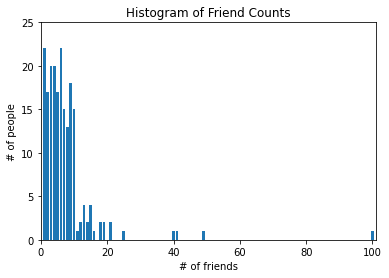

In [6]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

random.seed(0)
# I used trial and error to choose num_iters and step_size.
# This will run for a while.
learning_rate = 0.001

inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)
assert 30.50 < beta[0] < 30.70  # constant
assert  0.96 < beta[1] <  1.00  # num friends
assert -1.89 < beta[2] < -1.85  # work hours per day
assert  0.91 < beta[3] <  0.94  # has PhD

In [7]:
# Print out the formula
print("minutes="+str(beta[0])+" + "+str(beta[1])+" friends "+str(beta[2])+" workhours + "+str(beta[3])+" phd")


minutes=30.514795945185586 + 0.9748274277323267 friends -1.8506912934343662 workhours + 0.91407780744768 phd


### How good is your model?
Again, we could use R-square to calculate the square error of your output against actual output


In [8]:
from scratch.simple_linear_regression import total_sum_of_squares

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68

### Regularization
In practice, you’d often like to apply linear regression to datasets with large numbers of variables. This creates a couple of extra wrinkles. <br>
First, the more variables you use, the more likely you are to overfit your model to the training set. <br>
Second, the more nonzero coefficients you have, the harder it is to make sense of them. <br>
Regularization is an approach in which we add to the error term a penalty that gets larger as beta gets larger. We then minimize the combined error and penalty. The more importance we place on the penalty term, the more we discourage large coefficients.

In [9]:
# alpha is a *hyperparameter* controlling how harsh the penalty is.
# Sometimes it's called "lambda" but that already means something in Python.
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    """estimate error plus ridge penalty on beta"""
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

In [10]:
# We can then plug this into gradient descent in the usual way:
from scratch.linear_algebra import add

def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    """gradient of just the ridge penalty"""
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    """
    the gradient corresponding to the ith squared error term
    including the ridge penalty
    """
    return add(sqerror_gradient(x, y, beta),
               ridge_penalty_gradient(beta, alpha))

### In-class exercise 1
Now we want to modify the least_squares_fit function to use the sqerror_ridge_gradient instead of sqerror_gradient. Please implement the function least_squares_fit_ridge

In [11]:
def least_squares_fit_ridge(xs: List[Vector],
                      ys: List[float],
                      alpha: float,
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_ridge_gradient(x, y, guess, alpha)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess


In [12]:
# Now alpha is set to 0, there’s no penalty at all and we get the same results as before
random.seed(0)
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.0,  # alpha
                                 learning_rate, 5000, 25)
# [30.51, 0.97, -1.85, 0.91]
assert 5 < dot(beta_0[1:], beta_0[1:]) < 6
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0) < 0.69

least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1513.09it/s]


In [13]:
# As we increase alpha, the goodness of fit gets worse, but the size of beta gets smaller

beta_0_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.1,  # alpha
                                   learning_rate, 5000, 25)
# [30.8, 0.95, -1.83, 0.54]
assert 4 < dot(beta_0_1[1:], beta_0_1[1:]) < 5
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0_1) < 0.69

beta_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 1,  # alpha
                                 learning_rate, 5000, 25)
# [30.6, 0.90, -1.68, 0.10]
assert 3 < dot(beta_1[1:], beta_1[1:]) < 4
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_1) < 0.69

beta_10 = least_squares_fit_ridge(inputs, daily_minutes_good,10,  # alpha
                                  learning_rate, 5000, 25)
# [28.3, 0.67, -0.90, -0.01]
assert 1 < dot(beta_10[1:], beta_10[1:]) < 2
assert 0.5 < multiple_r_squared(inputs, daily_minutes_good, beta_10) < 0.6

least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1449.11it/s]


### in-class exercise 2
Another approach is lasso regression, which uses the penalty as follow, please try to explore this penalty and evaluate the performance.


In [14]:
def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

def squared_error_lasso(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    """estimate error plus ridge penalty on beta"""
    return error(x, y, beta) ** 2 + lasso_penalty(beta, alpha)

def lasso_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    """gradient of just the ridge penalty"""
    return [0.] + [alpha * beta_j / abs(beta_j) for beta_j in beta[1:]]

def sqerror_lasso_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    """
    the gradient corresponding to the ith squared error term
    including the ridge penalty
    """
    return add(sqerror_gradient(x, y, beta),
               lasso_penalty_gradient(beta, alpha))

def least_squares_fit_lasso(xs: List[Vector],
                      ys: List[float],
                      alpha: float,
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_lasso_gradient(x, y, guess, alpha)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess



### in-class exercise 3
scikit-learn has a linear_model module that provides a LinearRegression model similar to ours, as well as ridge regression, lasso regression, and other types of regularization. Please explore that and apply it to our data.

In [15]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(inputs, daily_minutes_good)

print(clf.coef_)
print(clf.intercept_)

[ 0.          0.93716634 -1.85637915  0.25460075]
31.128033648185742
